Source://heartbeat.fritz.ai/data-preprocessing-and-visualization-implications-for-your-machine-learning-model-8dfbaaa51423

In [22]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
chocolate_data = pd.read_csv("flavors_of_cacao.csv")

In [3]:
chocolate_data.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [4]:
chocolate_data.isnull().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [6]:
chocolate_data.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

In [7]:
original_col = chocolate_data.columns

In [8]:
original_col

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [9]:
new_col = ['Company', 'Species', 'REF', 'ReviewDate', 'CocoaPercent','CompanyLocation', 'Rating', 'BeanType', 'Country']

In [10]:
chocolate_data =chocolate_data.rename(columns=dict(zip(original_col, new_col)))

In [11]:
chocolate_data.head()

,Company,Species,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,Country
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [12]:
#Remove % sign from CocoaPercent column 
chocolate_data['CocoaPercent'] = chocolate_data['CocoaPercent'].str.replace('%','').astype(float)/100

In [13]:
chocolate_data.head()

,Company,Species,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,Country
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


In [17]:
chocolate_data['BlendNotBlend'] = np.where(np.logical_or(np.logical_or(chocolate_data['Species'].str.lower().str.contains(',|(blend)|;'),chocolate_data['Country'].str.len() == 1), chocolate_data['Country'].str.lower().str.contains(',')),1, 0)

/home/barbabra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


# Visualization

## Histogram

/home/barbabra/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


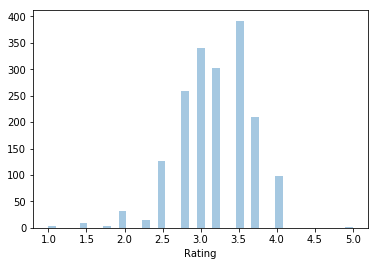

In [23]:
sb.distplot(chocolate_data['Rating'],kde = False)
plt.show()

/home/barbabra/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


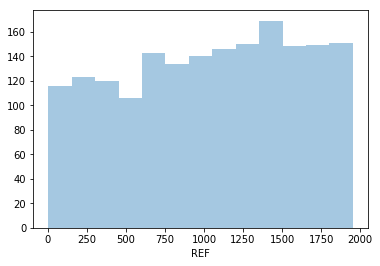

In [24]:
sb.distplot(chocolate_data['REF'],kde = False)
plt.show()

/home/barbabra/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


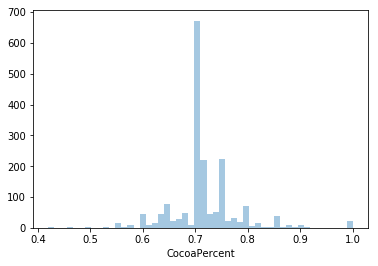

In [25]:
sb.distplot(chocolate_data['CocoaPercent'],kde = False)
plt.show()

## Boxplot

Text(0.5,1,'Boxplot, Rating for countries (+blends)')

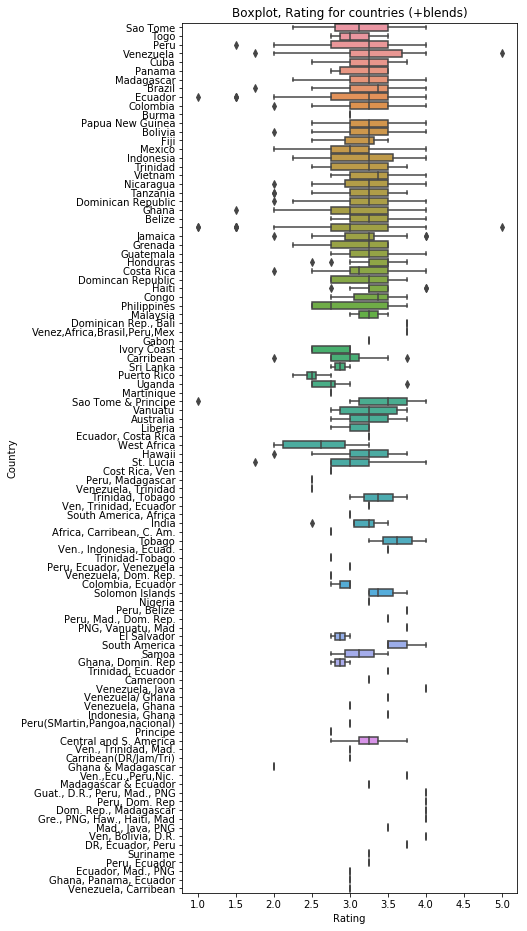

In [27]:
fig, ax = plt.subplots(figsize=[6, 16])
sb.boxplot(
    data=chocolate_data,
    y='Country',
    x='Rating'
)
ax.set_title('Boxplot, Rating for countries (+blends)')

## Violin

Text(0.5,1,'Boxplot, Rating by Blend/Pure')

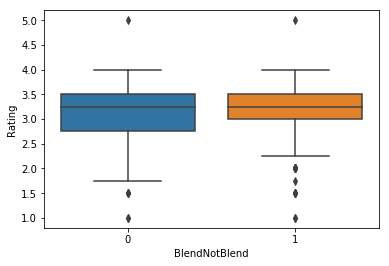

In [28]:
sb.boxplot(
    data=chocolate_data,
    x='BlendNotBlend',
    y='Rating',
)
ax.set_title('Boxplot, Rating by Blend/Pure')

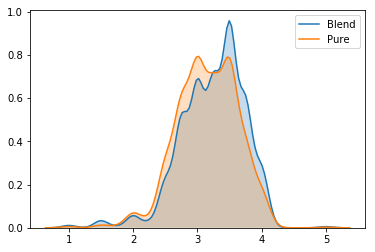

In [30]:
Blended = chocolate_data.loc[chocolate_data.BlendNotBlend == 1]
NotBlended = chocolate_data.loc[chocolate_data.BlendNotBlend == 0]
ax = sb.kdeplot(Blended.Rating,shade=True,shade_lowest=False, label = "Blend")
ax = sb.kdeplot(NotBlended.Rating,shade=True,shade_lowest=False, label = "Pure")

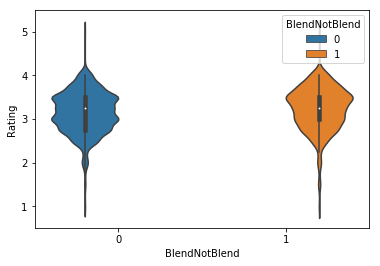

In [34]:
ax = sb.violinplot(x="BlendNotBlend", y="Rating", data=chocolate_data, hue="BlendNotBlend")